In [18]:
from torch.utils.cpp_extension import load
import torch
qr = load(name="qr", sources=["qr_entry.cpp", "qr.cu"], extra_cuda_cflags=["--keep", "--keep-dir", "/workspace/qr/temp", "--extended-lambda"], verbose=True)

import time
output = torch.zeros((10000, 18), device="cuda", dtype=torch.uint8)
lock = torch.zeros((128,), device="cuda", dtype=torch.int32)

torch.cuda.synchronize()
t0 = time.time()
qr.qr(lock, output)
torch.cuda.synchronize()
t1 = time.time()
print(f"{t1-t0:.2f}")

Using /root/.cache/torch_extensions/py310_cu121 as PyTorch extensions root...
The input conditions for extension module qr have changed. Bumping to version 16 and re-building as qr_v16...
Detected CUDA files, patching ldflags
Emitting ninja build file /root/.cache/torch_extensions/py310_cu121/qr/build.ninja...
Building extension module qr_v16...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)


[1/3] /usr/local/cuda/bin/nvcc --generate-dependencies-with-compile --dependency-output qr.cuda.o.d -DTORCH_EXTENSION_NAME=qr_v16 -DTORCH_API_INCLUDE_EXTENSION_H -DPYBIND11_COMPILER_TYPE=\"_gcc\" -DPYBIND11_STDLIB=\"_libstdcpp\" -DPYBIND11_BUILD_ABI=\"_cxxabi1011\" -isystem /usr/local/lib/python3.10/dist-packages/torch/include -isystem /usr/local/lib/python3.10/dist-packages/torch/include/torch/csrc/api/include -isystem /usr/local/lib/python3.10/dist-packages/torch/include/TH -isystem /usr/local/lib/python3.10/dist-packages/torch/include/THC -isystem /usr/local/cuda/include -isystem /usr/include/python3.10 -D_GLIBCXX_USE_CXX11_ABI=0 -D__CUDA_NO_HALF_OPERATORS__ -D__CUDA_NO_HALF_CONVERSIONS__ -D__CUDA_NO_BFLOAT16_CONVERSIONS__ -D__CUDA_NO_HALF2_OPERATORS__ --expt-relaxed-constexpr -gencode=arch=compute_89,code=compute_89 -gencode=arch=compute_89,code=sm_89 --compiler-options '-fPIC' --keep --keep-dir /workspace/qr/temp --extended-lambda -std=c++17 -c /workspace/qr/qr.cu -o qr.cuda.o 
/w

: 

In [ ]:
import time
output = torch.zeros((10000, 18), device="cuda", dtype=torch.uint8)
lock = torch.zeros((128,), device="cuda", dtype=torch.int32)

torch.cuda.synchronize()
t0 = time.time()
qr.qr(lock, output)
torch.cuda.synchronize()
t1 = time.time()
print(f"{t1-t0:.2f}")

total_iters: 1000000000000. per_thread_iters: 15258789.


1.41


In [2]:
!pip3 install ninja pybind11 matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.8/238.8 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 79.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 114.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 147.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 283.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python -m pip install --upgrade pip


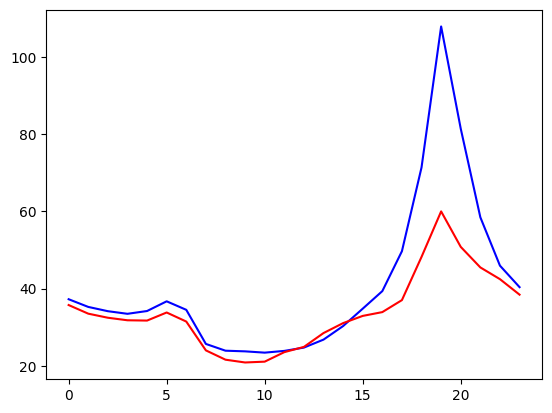

[[37, 35], [35, 33], [34, 32], [33, 31], [34, 31], [36, 33], [34, 31], [25, 23], [23, 21], [23, 20], [23, 21], [23, 23], [24, 24], [26, 28], [30, 31], [34, 32], [39, 33], [49, 37], [71, 48], [107, 60], [81, 50], [58, 45], [45, 42], [40, 38]]


In [9]:
vals = [('07:00:00+00:00', 37.2528125, 35.746588541666675), ('08:00:00+00:00', 35.26062499999999, 33.511692708333335), ('09:00:00+00:00', 34.1521875, 32.45552083333333), ('10:00:00+00:00', 33.4746875, 31.797812499999996), ('11:00:00+00:00', 34.19843749999999, 31.720182291666667), ('12:00:00+00:00', 36.71062499999999, 33.81401041666666), ('13:00:00+00:00', 34.506874999999994, 31.466536458333326), ('14:00:00+00:00', 25.669687499999995, 23.99766493055555), ('15:00:00+00:00', 23.913125, 21.581822916666667), ('16:00:00+00:00', 23.744687499999994, 20.86104166666667), ('17:00:00+00:00', 23.40937499999999, 21.074401041666665), ('18:00:00+00:00', 23.860625000000006, 23.537526041666666), ('19:00:00+00:00', 24.719375000000003, 24.895686553030302), ('20:00:00+00:00', 26.7853125, 28.483648437499998), ('21:00:00+00:00', 30.300625000000004, 31.06411458333333), ('22:00:00+00:00', 34.80375, 32.93028645833333), ('23:00:00+00:00', 39.353750000000005, 33.91421875), ('00:00:00+00:00', 49.698125000000005, 37.0239180871212), ('01:00:00+00:00', 71.40562500000001, 48.22234611742424), ('02:00:00+00:00', 107.94031249999999, 60.01670928030305), ('03:00:00+00:00', 81.46124999999999, 50.82132812500001), ('04:00:00+00:00', 58.495483870967746, 45.49544232649072), ('05:00:00+00:00', 45.957741935483874, 42.45541577060932), ('06:00:00+00:00', 40.38354838709678, 38.435215053763436)]
import matplotlib.pyplot as plt
plt.plot([a[1] for a in vals], color="blue")
plt.plot([a[2] for a in vals], color="red")
plt.show()
print([[int(a[1]), int(a[2])] for a in vals])

In [2]:
!pip3 install ninja pybind11 matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.8/238.8 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 79.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 121.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 149.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 276.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python -m pip install --upgrade pip
